# Random Forest Regression from SKLearn
Every decision tree has high variance, but when we combine all of them together in parallel then the resultant variance is low as each decision tree gets perfectly trained on that particular sample data and hence the output doesn’t depend on one decision tree but multiple decision trees. In the case of a classification problem, the final output is taken by using the majority voting classifier. In the case of a regression problem, the final output is the mean of all the outputs.<br>
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.<br>
Random Forest work on three functions :-<br>
(1) Boot Strapping<br>
(2) Random Subspace<br>
(3) Prediction
# ----------------------------------------------------------------------------------------------------------------------------------------------------------
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# -----------------------------------------------------------------------------------------------------------------------------------------------------------
## Calling Data
Data is call for work. The Columns are selected here is according to the BREAST CANCER DATASET from WINCONSIN Hospital Easily find on Kaggle(www.kaggle.com).<br>
Creating Dataset from original columns from the dataset so that you won't face any trouble regarding the dataset. I use Breast Cancer Dataset to train model and predict whether the person is having cancer or not.

In [2]:
cancer_df = pd.read_csv('./Dataset/Breast Cancer Dataset/Breast_Cancer_Data.csv')
cancer_df['diagnosis'].replace(['B', 'M'], [0, 1], inplace =True)
cancer_df['label'] = cancer_df.diagnosis
cancer_df.drop([cancer_df.columns[0], cancer_df.columns[1], cancer_df.columns[32]], axis = 1, inplace = True)

## Preparing Data For Model

In [3]:
cancer_data = cancer_df.iloc[:,0:1].values
cancer_labels = cancer_df.iloc[:,-1].values
cancer_data = cancer_data.reshape(cancer_data.shape[0],1)
cancer_labels = cancer_labels.reshape(cancer_labels.shape[0],1)

### Train Test Spliting

In [4]:
train_cancer, test_cancer, train_labels, test_labels = train_test_split(cancer_data,cancer_labels,test_size = 0.25)

## Fitting the Model over Data

In [5]:
Forest_cancer=RandomForestRegressor()
Forest_cancer.fit(train_cancer,train_labels)

/home/daku/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Predicting the result

#### Training Data

In [6]:
train_predict = Forest_cancer.predict(train_cancer)
train_mse = mean_squared_error(train_labels,train_predict)
train_mae = mean_absolute_error(train_labels,train_predict)
train_score = -(round(Forest_cancer.score(train_labels,train_predict)))*100

print("----------------------------------------------------------\n")
print("Mean Square Error Training Data ; {}\nMean Absolute Error Training Data : {}\nScore Value of Training Data : {}".format(train_mse,train_mae,train_score))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Mean Square Error Training Data ; 0.028556359945016957
Mean Absolute Error Training Data : 0.08031147999105745
Score Value of Training Data : 100.0

----------------------------------------------------------


#### Testing Data

In [7]:
test_predict = Forest_cancer.predict(test_cancer)
test_mse = mean_squared_error(test_labels,test_predict)
test_mae = mean_absolute_error(test_labels,test_predict)
test_score = -(round(Forest_cancer.score(test_labels,test_predict)))*100

print("----------------------------------------------------------\n")
print("Mean Square Error Testing Data ; {}\nMean Absolute Error Testing Data : {}\nScore Value of Testing Data : {}".format(test_mse,test_mae,test_score))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Mean Square Error Testing Data ; 0.11369514846683298
Mean Absolute Error Testing Data : 0.16399422799422797
Score Value of Testing Data : 100.0

----------------------------------------------------------


# ------------------------------------------------------------------------------------------------------------------------------------------------------------
## Plotting the regression line

#### Training Data

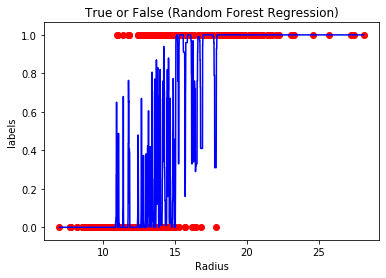

In [8]:
X_grid = np.arange(min(train_cancer), max(train_cancer), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(train_cancer, train_labels, color = 'red')
plt.plot(X_grid, Forest_cancer.predict(X_grid), color = 'blue')
plt.title('True or False (Random Forest Regression)')
plt.ylabel('labels')
plt.xlabel('Radius')
plt.show()

#### Testing Data

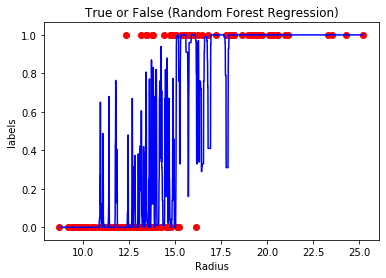

In [9]:
X_grid = np.arange(min(test_cancer), max(test_cancer), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(test_cancer, test_labels, color = 'red')
plt.plot(X_grid, Forest_cancer.predict(X_grid), color = 'blue')
plt.title('True or False (Random Forest Regression)')
plt.ylabel('labels')
plt.xlabel('Radius')
plt.show()